## Выполнил Атахужаев Собитхон (ИССА, науки о данных)

АНалаиз тональности текста
ЧТобы вычислить АНалаиз тональности текста дадим оценку в каждое слово в нашем предложении:
+1 если позитивная тональность
-1 если негативная тональность
После этого суммируем оценку всех слов чтобы узнать общую тональность предложения.
Это 1 из методов. Но существует ряд ограничений. Но среди всех ограничений самыми существенными являются:
    1. пренебрежение текстом
    2. пренебрежение словами которые находятся ближе к этим словам
Пример: не умный = 0; не = -1; умный=1; -1+1=0;
Другим методом является "Bag of words"(мешок слов). Каждый текст мы рассматриваем как вектор с размером N(размер словаря);
В каждой ячейке нашего массива мы записываем сколько раз встречался данное слово в тексте. Например, ДЛя текста 
John likes to watch movies. Mary likes movies too. имеем такой вектор [1, 2, 1, 1, 2, 0, 0, 0, 1, 1]. Слово likes встречается 2 раза и т.д. После этого с помощью разных алгоритмов Машинного обучения(логистическая реггрессия, метод опорных векторов(SVM),...) производим классификацию и прогнозируем тональность данных.
Для этого используем метод Word2Vec разработанное компанией GOOGLE. Данный метод уменьшает объем данных и кроме того он учитывает контекст.
Word2Vec включает в себе 2 метода:
    1.CBOW - непрерывный мешок слов
    2.Skip-gram - предсказание набора близлежащих слов на основании одного слова ()
Оба метода для классификации используют нейронные сети.


In [1]:
from gensim.models.word2vec import Word2Vec

In [28]:
%matplotlib inline
import os

In [2]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [3]:
#Теперь рассмотрим взаимосвязи между словами с помощью метода most_similar:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=100)

[(u'queen', 0.7118192911148071),
 (u'monarch', 0.6189674139022827),
 (u'princess', 0.5902431607246399),
 (u'crown_prince', 0.5499460697174072),
 (u'prince', 0.5377321243286133),
 (u'kings', 0.5236844420433044),
 (u'Queen_Consort', 0.5235945582389832),
 (u'queens', 0.5181134343147278),
 (u'sultan', 0.5098593235015869),
 (u'monarchy', 0.5087411999702454),
 (u'royal_palace', 0.5087165832519531),
 (u'throne', 0.5005807280540466),
 (u'royal', 0.4938204884529114),
 (u'Princess_Sikhanyiso', 0.4936617612838745),
 (u'ruler', 0.4909276068210602),
 (u'empress', 0.4887813925743103),
 (u'Prince_Paras', 0.4832945466041565),
 (u'princes', 0.48108160495758057),
 (u'King_Ahasuerus', 0.47894203662872314),
 (u'very_pampered_McElhatton', 0.47636353969573975),
 (u'NYC_anglophiles_aflutter', 0.47184517979621887),
 (u'monarch_Gyanendra', 0.4703860878944397),
 (u'Princess_Sirindhorn', 0.46853649616241455),
 (u'goddess', 0.46613648533821106),
 (u'absolute_monarch', 0.46446692943573),
 (u'Savory_aromas_wafted',

In [4]:
model.most_similar(positive=['ate','speak'], negative=['eat'], topn=100)

[(u'spoke', 0.6965223550796509),
 (u'speaking', 0.6261292099952698),
 (u'conversed', 0.5754592418670654),
 (u'spoken', 0.5704882740974426),
 (u'speaks', 0.5630601644515991),
 (u'talked', 0.5199896097183228),
 (u'chatted', 0.5146749019622803),
 (u'interviewed', 0.4727758765220642),
 (u'attended', 0.45846396684646606),
 (u'listened_politely', 0.45828357338905334),
 (u'spoke_eloquently', 0.45515596866607666),
 (u'Speaking', 0.4437018632888794),
 (u'listened_intently', 0.44103628396987915),
 (u'exchanged_greetings', 0.4370613098144531),
 (u'listened', 0.4349958300590515),
 (u'interacted', 0.431366890668869),
 (u'crossed_paths', 0.4275667667388916),
 (u'corresponded', 0.42430830001831055),
 (u'babbled', 0.42262762784957886),
 (u'discuss', 0.41420742869377136),
 (u'communicated', 0.4131298065185547),
 (u'talk', 0.4111563563346863),
 (u'met', 0.4106965661048889),
 (u'laughed_derisively', 0.4083397388458252),
 (u'Boehner_teared', 0.40474721789360046),
 (u'nodded_knowingly', 0.4047172963619232)

По полученным результатам мы можем увидеть что оно позволяет нам определить самые нетривиальные взаимосвязи с разными словами. 
Далее чтобы оценить, как Word2Vec различает слова и класстеризует слова возмъем с сайта  Enchanted Learning. чтобы уменьшить размерность векторов используем алгоритм t-SNE(sklearn - scikit-learn), который понижает размерьность. В качестве примера возмъем набор слов из разных областей(питание, спорт,погода,....)

Во-первых, мы должны получить векторы слов следующим образом:

In [5]:
import numpy as np

def getWordVecs(words):
    vecs = []
    for word in words:
        word = word.replace('\n', '')
        try:
            vecs.append(model[word].reshape((1,300)))
        except KeyError:
            continue
    vecs = np.concatenate(vecs)
    return np.array(vecs, dtype='float') #TSNE expects float type values

with open('animals.txt', 'r') as infile:
    animals_words = infile.readlines()

with open('sports.txt', 'r') as infile:
    sports_words = infile.readlines()

with open('weather.txt', 'r') as infile:
    weather_words = infile.readlines()

with open('food.txt', 'r') as infile:
    food_words = infile.readlines()



animals_vecs = getWordVecs(animals_words)
food_vecs = getWordVecs(food_words)
weather_vecs = getWordVecs(weather_words)
sports_vecs = getWordVecs(sports_words)

Затем мы можем использовать TSNE и Matplotlib для визуализации кластеров со следующим кодом:

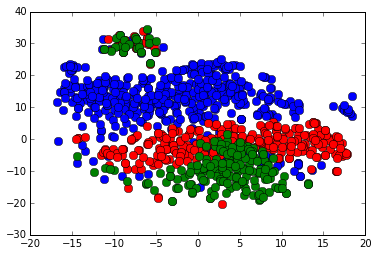

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

ts = TSNE(2)
reduced_vecs = ts.fit_transform(np.concatenate((food_vecs, sports_vecs, weather_vecs)))

#color points by word group to see if Word2Vec can separate them
for i in range(len(reduced_vecs)):
    if i < len(food_vecs):
        #food words colored blue
        color = 'b'
    elif i >= len(food_vecs) and i < (len(food_vecs) + len(sports_vecs)):
        #sports words colored red
        color = 'r'
    else:
        #weather words colored green
        color = 'g'
    plt.plot(reduced_vecs[i,0], reduced_vecs[i,1], marker='o', color=color, markersize=8)

## Анализ настроения тональности твитов()

смайлик (:-)) соответствует позитивным настроениям(эмотикон), и грустное лицо  (:-() относиться к отрицательному.

In [13]:
from sklearn.cross_validation import train_test_split
from gensim.models.word2vec import Word2Vec

with open('pos_tweets.txt', 'r') as infile:
    pos_tweets = infile.readlines()

with open('neg_tweets.txt', 'r') as infile:
    neg_tweets = infile.readlines()

# для полезных отзывов 1, для отрицательных  
#use 1 for positive sentiment, 0 for negative
y = np.concatenate((np.ones(len(pos_tweets)), np.zeros(len(neg_tweets))))

x_train, x_test, y_train, y_test = train_test_split(np.concatenate((pos_tweets, neg_tweets)), y, test_size=0.2)

#Do some very minor text preprocessing
def cleanText(corpus):
    corpus = [z.lower().replace('\n','').split() for z in corpus]
    return corpus

x_train = cleanText(x_train)
x_test = cleanText(x_test)

n_dim = 300
#Initialize model and build vocab
imdb_w2v = Word2Vec(size=n_dim, min_count=10)
imdb_w2v.build_vocab(x_train)

#Train the model over train_reviews (this may take several minutes)
imdb_w2v.train(x_train)

449598

## Создаем векторы слов для усреднение этих векторов в твите:
Построим слово вектор для подготовки набора, используя среднее значение всех векторов слов в твиттере, а затем их масштабировать
#А при масштабирование мы используем стандартизцию. С помощью этого мы данные приводимк гауссовому распределению со средним значением, равным нулю

In [14]:
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in text:
        try:
            vec += imdb_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

В последствии, мы получим что значения, которые превышают среднее, будут положительными, а те, что ниже среднего значения будет отрицательным. Многие модели ML требуют масштабируется наборов данных для эффективного выполнения, особенно с большим количеством функций отрицательными. Для эффективной работы многих моделей машинного обучения требуются масштабированные наборы данных, особенно для моделей с большим количеством признаков, таких как текстовые классификаторы.

In [15]:
from sklearn.preprocessing import scale
train_vecs = np.concatenate([buildWordVector(z, n_dim) for z in x_train])
train_vecs = scale(train_vecs)
#Тренируем word2vec твит тестах
imdb_w2v.train(x_test)

110800

In [16]:
#Построим свои заданные векторы тестирования и масштабировать их для оценки.
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in x_test])
test_vecs = scale(test_vecs)

Далее мы хотим подтвердить наш классификатор путем расчета точности прогнозирования на тестовых данных, а также изучения его характеристической кривой приемника Рабочая (ROC). Кривые ROC измерения истинной положительной скорости по сравнению с ложно-положительной скорости классификатора при настройке параметра модели. В нашем случае, мы регулируем отсечения пороговой вероятности классификации твит в качестве положительного или отрицательного настроения. Как правило, чем больше площадь под кривой (AUC), тем лучше наша модель делает на максимизацию истинных срабатываний при минимизации ложных срабатываний.

Для начала мы будем тренировать свой классификатор. Будем использовать метод стохастического градиентного спуска для логистической регрессии(Stochastic Gradient Descent for Logistic Regression).

In [17]:
from sklearn.linear_model import SGDClassifier

lr = SGDClassifier(loss='log', penalty='l1')
lr.fit(train_vecs, y_train)

print 'Test Accuracy: %.2f'%lr.score(test_vecs, y_test)

Test Accuracy: 0.45


Затем мы создадим кривую ROC для оценки (с помощью Matplotlib и метод roc_curve из Scikit-Learn-х метрического пакета)

In [20]:
#Create ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

pred_probas = lr.predict_proba(test_vecs)[:,1]

fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

<img src='data/2.jpg'> </img>

Без процедуры создания признаков и с минимальной предобработкой текста мы можем получить точность 77%, используя простую линейную модель из библиотеки scikit-learn. Примечательно, что удаление знаков препинания снижает точность. Это означает, что Word2Vec способен находить полезные признаки, когда присутствуют такие символы, как «?» и «!». Работа с отдельными словами или чуть большого обучения или делая более серезнуб предобработку и настроив параметров Word2Vec и классификатора мы можем повысить точность. 

In [22]:
from NNet import NeuralNet

nnet = NeuralNet(100, learn_rate=1e-1, penalty=1e-8)
maxiter = 1000
batch = 150
_ = nnet.fit(train_vecs, y_train, fine_tune=False, maxiter=maxiter, SGD=True, batch=batch, rho=0.9)

print 'Test Accuracy: %ё.2f'%nnet.score(test_vecs, y_test)

Test Accuracy: 0.83

ТУт нам удалось улучшить наш результат до 55%. Такие низкие результаты были получены так как  Был выбран рандомный отзывы из твиттера. и файлы содержат мало смайликов которые изображают Эмоции.

## Использование Doc2Vec для анализа обзор(рецензий ) фильмов

В случае твитов использование усредненных векторов слов давало хорошие результаты. Это происходит потому, что твиты обычно содержат не более нескольких десятков слов, что позволяет нам сохранить соответствующие признаки даже при усреднении. Однако если мы будем игнорировать порядок слов и контекст в масштабе абзацев, мы рискуем потерять важные признаки.

В этом случае лучше использовать Doc2Vec, чтобы создать входные признаки. В качестве примера мы будем использовать набор данных IMDB, содержащий рецензии на кинофильмы, чтобы протестировать эффективность Doc2Vec в области анализа тональности текста. Набор данных содержит 25 000 позитивных рецензий, 25 000 негативных и 50 000 рецензий, тональность которых неизвестна.

Сначала мы обучаем Doc2Vec на рецензиях неизвестной тональности. Дальнейшая методика идентична примеру для Word2Vec, представленному выше, за исключением того, что мы будем использовать в качестве входных данных векторы обоих методов DM и DBOW, объединив их.

In [4]:
import os
pos_reviews = []
root = 'IMDB_data/pos'
for filename in os.listdir(root):
    with open(os.path.join(root, filename), 'r') as f:
        pos_reviews.append(f.read().strip())

neg_reviews = []
root = 'IMDB_data/neg'
for filename in os.listdir(root):
    with open(os.path.join(root, filename), 'r') as f:
        neg_reviews.append(f.read().strip())

unsup_reviews = []
root = 'IMDB_data/unsup'
for filename in os.listdir(root):
    with open(os.path.join(root, filename), 'r') as f:
        unsup_reviews.append(f.read().strip())
        
# unsup_reviews = iter(unsup_reviews)

In [6]:
import gensim
import gensim.models.doc2vec

Создаем объекты типа LabeledSentence:

In [7]:
LabeledSentence = gensim.models.doc2vec.LabeledSentence


from sklearn.cross_validation import train_test_split
import numpy as np

y = np.concatenate((np.ones(len(pos_reviews)), np.zeros(len(neg_reviews))))

x_train, x_test, y_train, y_test = train_test_split(np.concatenate((pos_reviews, neg_reviews)), y, test_size=0.2)

#Do some very minor text preprocessing
def cleanText(corpus):
    punctuation = """.,?!:;(){}[]"""
    corpus = [z.lower().replace('\n','') for z in corpus]
    corpus = [z.replace('<br />', ' ') for z in corpus]

    #treat punctuation as individual words
    for c in punctuation:
        corpus = [z.replace(c, ' %s '%c) for z in corpus]
    corpus = [z.split() for z in corpus]
    return corpus

x_train = cleanText(x_train)
x_test = cleanText(x_test)
unsup_reviews = cleanText(unsup_reviews)

#Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
#We do this by using the LabeledSentence method. The format will be "TRAIN_i" or "TEST_i" where "i" is
#a dummy index of the review.
def labelizeReviews(reviews, label_type):
    labelized = []
    for i,v in enumerate(reviews):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized

x_train = labelizeReviews(x_train, 'TRAIN')
x_test = labelizeReviews(x_test, 'TEST')
unsup_reviews = labelizeReviews(unsup_reviews, 'UNSUP')

Далее создаем экземпляры двух моделей Doc2Vec – DM и DBOW. Документация gensim рекомендует применять многократное обучение, а также либо варьировать скорость обучения, либо использовать случайный порядок входных данных при каждом проходе. Затем мы собираем векторы рецензий, на которых обучались модели.

In [17]:
import random

size = 400

#instantiate our DM and DBOW models
model_dm = gensim.models.Doc2Vec(min_count=1, window=10, size=size, sample=1e-3, negative=5, workers=3)
model_dbow = gensim.models.Doc2Vec(min_count=1, window=10, size=size, sample=1e-3, negative=5, dm=0, workers=3)

#build vocab over all reviews
model_dm.build_vocab(np.concatenate((list(x_train), list(x_test), list(unsup_reviews))).tolist()))
model_dbow.build_vocab(np.concatenate((x_train, x_test, unsup_reviews)))

#We pass through the data set multiple times, shuffling the training reviews each time to improve accuracy.
all_train_reviews = np.concatenate((x_train, unsup_reviews))
for epoch in range(10):
    perm = np.random.permutation(all_train_reviews.shape[0])
    model_dm.train(all_train_reviews[perm])
    model_dbow.train(all_train_reviews[perm])

#Get training set vectors from our models
def getVecs(model, corpus, size):
    vecs = [np.array(model[z.labels[0]]).reshape((1, size)) for z in corpus]
    return np.concatenate(vecs)

train_vecs_dm = getVecs(model_dm, x_train, size)
train_vecs_dbow = getVecs(model_dbow, x_train, size)

train_vecs = np.hstack((train_vecs_dm, train_vecs_dbow))

#train over test set
x_test = np.array(x_test)

for epoch in range(10):
    perm = np.random.permutation(x_test.shape[0])
    model_dm.train(x_test[perm])
    model_dbow.train(x_test[perm])

#Construct vectors for test reviews
test_vecs_dm = getVecs(model_dm, x_test, size)
test_vecs_dbow = getVecs(model_dbow, x_test, size)

test_vecs = np.hstack((test_vecs_dm, test_vecs_dbow))

Теперь мы готовы обучить классификатор на векторах рецензий. Мы снова будем использовать классификатор на основе стохастического градиентного спуска SGDClassifier из библиотеки scikit-learn.

In [18]:
from sklearn.linear_model import SGDClassifier

lr = SGDClassifier(loss='log', penalty='l1')
lr.fit(train_vecs, y_train)

print 'Test Accuracy: %.2f'%lr.score(test_vecs, y_test)

Test Accuracy: 0.86

Эта модель обеспечивает точность 0,86. Мы также можем построить ROC-кривую для данного классификатора:

In [19]:
#Create ROC curve
from sklearn.metrics import roc_curve, auc
%matplotlib inline
import matplotlib.pyplot as plt

pred_probas = lr.predict_proba(test_vecs)[:,1]

fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

<img src='data/1.jpg'> </img>

In [23]:
from NNet import NeuralNet

nnet = NeuralNet(50, learn_rate=1e-2)
maxiter = 500
batch = 150
_ = nnet.fit(train_vecs, y_train, fine_tune=False, maxiter=maxiter, SGD=True, batch=batch, rho=0.9)

print 'Test Accuracy: %.2f'%nnet.score(test_vecs, y_test)

Интересно, что в данном случае мы не наблюдаем подобного улучшения. Точность составляет 0,84, и мы не достигли уровня ошибок 7,42%.

Test Accuracy: 0.84